<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# Análise Exploratória de Dados com Python: Eleições de 2022
Professor: [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluna: [Maria Luiza Cordeiro](https://www.linkedin.com/in/malu-analise-de-dados/)

---

## **1\. Contexto**

O tribunal superior eleitoral (TSE) disponibilizou os dados brutos das urnas de votação utilizadas durante o processo eleitoral de 2022. No site do TSE ([link](https://resultados.tse.jus.br/oficial/app/index.html#/eleicao/resultados)) encontram-se os seguintes dados para cada urna:

 - **Registro Digital do Voto (RDV)**: Registro unitário dos votos;
 - **Boletim de Urna**: Resultados agregados;
 - **Log de Urna**: Todos os eventos que ocorreram na urna.

A documentação técnica para o processamento dos arquivo também se encontra no website do TSE ([link](https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica)).

> Para uma única urna (estado, cidade, zona e seção), utilizou-se o **Python** para processar o seu arquivo **RDV** e replicar os valores agregados do seu **Boletim de Urna** para o segundo turno de votação para presidente do processo eleitoral de 2022.



---



## **2\. Pacotes e bibliotecas**

In [1]:
!pip install asn1crypto==1.5.1

In [2]:
import re
import pandas as pd
import seaborn as sns



---


## **3\. Exploração**

### 3\.1 Coleta de Dados

No site de resultados do TSE ([link](https://resultados.tse.jus.br/oficial/app/index.html)), foi os dados de uma única urna, o *download* do arquivo RDV e então, o seu *upload* no ambiente do Google Colab.

### 3\.2 Descriptografia

In [3]:
!curl -s https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py -o rdv.py

In [4]:
!python rdv.py -r resultados.tse.jus.br_oficial_ele2022_arquivo-urna_407_dados_pe_25313_0149_0030_735931316f58456b68655a67706864613944794b6f422d7155453946325650384a434c454275306f5a44303d_o00407-2531301490030.rdv.txt > rdv.txt

2023-06-30 21:03:45,063 - INFO - Converte RDV resultados.tse.jus.br_oficial_ele2022_arquivo-urna_407_dados_pe_25313_0149_0030_735931316f58456b68655a67706864613944794b6f422d7155453946325650384a434c454275306f5a44303d_o00407-2531301490030.rdv.txt


### 3\.3 Limpeza

In [5]:
content = []

with open(file="rdv.txt", mode="r") as fp:
  for line in fp.readlines():
    if "Governador" in line:
      break
    else:
      content.append(line)

In [6]:
len(content)

330

In [7]:
for line in content[0:10]:
  print(line)


----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]

  3 - nominal  - [13]

  4 - nominal  - [13]

  5 - nominal  - [13]

  6 - nominal  - [13]

  7 - nominal  - [13]



### 3\.4 Extração

In [8]:
pattern = re.compile(pattern="\[(.*?)\]")

In [9]:
votes = []

for line in content:
  if "branco" in line:
    votes.append({"voto": "branco", "quantidade": 1})
  if "nulo" in line:
    votes.append({"voto": "nulo", "quantidade": 1})
  if "nominal" in line:
    vote = re.findall(pattern=pattern, string=line)[0]
    votes.append({"voto": f"{vote}", "quantidade": 1})

In [10]:
len(votes)

326

In [11]:
for vote in votes[0:10]:
  print(vote)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}




---



## **4\. Processamento**

### 4\.1 DataFrame

In [12]:
votes_table = pd.DataFrame(votes)

In [13]:
votes_table.tail(n=30)

,voto,quantidade
296,22,1
297,22,1
298,22,1
299,22,1
300,22,1
301,22,1
302,22,1
303,22,1
304,22,1
305,22,1


In [14]:
votes_table.shape

(326, 2)

In [15]:
votes_table.to_csv("rdv.csv", header=True, index=False)

### 4\.2 Agregação

In [16]:
votes_table_agg = votes_table.groupby('voto').agg('sum').reset_index()

In [17]:
votes_table_agg

,voto,quantidade
0,13,139
1,22,170
2,branco,5
3,nulo,12


In [18]:
votes_table_agg = votes_table_agg.sort_values(by='quantidade', ascending=False)

In [19]:
votes_table_agg

,voto,quantidade
1,22,170
0,13,139
3,nulo,12
2,branco,5


In [20]:
votes_table_agg['quantidade_pct'] = round(100 * (votes_table_agg['quantidade'] / votes_table_agg['quantidade'].sum()), 2)

In [21]:
votes_table_agg

,voto,quantidade,quantidade_pct
1,22,170,52.15
0,13,139,42.64
3,nulo,12,3.68
2,branco,5,1.53




---



## **5\. Visualização**

In [22]:
URNA = "Recife/PE - 149 - 30"

### 5\.1 Visualizção no Gráfico de Barras (absoluto)

In [23]:
x_column = 'voto'
y_column = 'quantidade'

In [24]:
title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade'

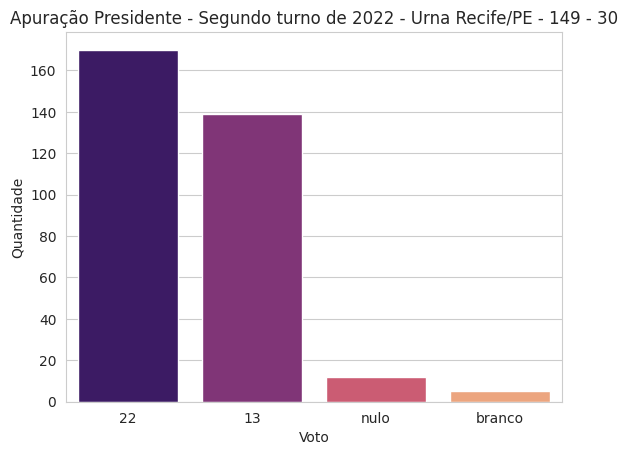

In [25]:
with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column, palette='magma')
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);

### 5\.2 Visualizção no Gráfico de Barras (relativo)

In [26]:
x_column = 'voto'
y_column = 'quantidade_pct'

In [27]:
title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade (%)'

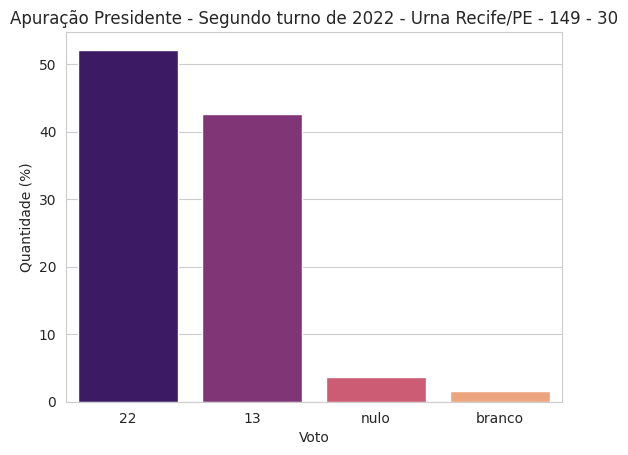

In [28]:
with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column, palette='magma')
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);